#畫畫圖

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pylab import *

In [3]:
dataframe = pd.read_pickle('./gossiping_big.pkl')
dataframe['day'] = dataframe.apply(lambda r: r.time.dayofweek, axis=1)
dataframe['hour'] = dataframe.apply(lambda row: row.time.hour, axis=1)

In [10]:
popularity2hour = dataframe.groupby('hour')['popularity_postive', 'popularity_negative', 'popularity_overall'].mean()
popularity2day = dataframe.groupby('day')['popularity_postive', 'popularity_negative', 'popularity_overall'].mean()

## 推噓文數隨小時變化圖

      popularity_postive  popularity_negative  popularity_overall
hour                                                             
0              14.578775             4.150257           29.610307
1              14.840562             3.517823           30.296400
2              15.582686             3.707958           32.076002
3              16.613507             3.891600           34.793417
4              19.728780             5.125366           39.941951
5              20.141709             6.257122           41.112491
6              20.428992             7.975840           42.616382
7              20.129051             8.459635           42.731291
8              19.105335             7.397838           40.451707
9              18.145031             6.573864           38.682421
10             17.784639             6.435819           38.203519
11             17.623459             6.881640           38.360249
12             17.020009             6.065855           36.080554
13        

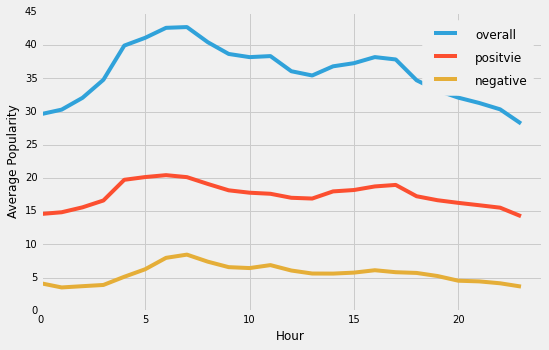

In [67]:
print(popularity2hour)
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 5))
    plt.xlabel('Hour')
    plt.xlim((0, 24))
    plt.ylabel('Average Popularity')
    lines = plt.plot(popularity2hour.popularity_overall, '-', label='overall')
    lines = plt.plot(popularity2hour.popularity_postive, '-', label='positvie')
    lines = plt.plot(popularity2hour.popularity_negative, '-', label='negative')
    plt.legend()

## 推噓文數隨Weekday變化圖

     popularity_postive  popularity_negative  popularity_overall
day                                                             
0             16.817655             5.175250           34.584980
1             16.908572             5.298102           34.485189
2             17.068308             5.462697           34.882229
3             17.290543             5.562669           35.357102
4             16.701392             5.296986           34.465719
5             16.292072             4.766048           32.755002
6             16.315952             4.959937           33.332401


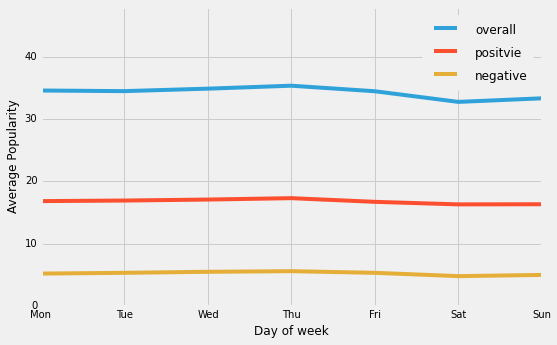

In [66]:
print(popularity2day)
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 5))
    plt.xlabel('Day of week')
    plt.xlim((0, 6))
    plt.ylim(0, 48)
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.ylabel('Average Popularity')
    lines = plt.plot(popularity2day.popularity_overall, '-', label='overall')
    lines = plt.plot(popularity2day.popularity_postive, '-', label='positvie')
    lines = plt.plot(popularity2day.popularity_negative, '-', label='negative')
    plt.legend()

##人氣直方圖： 統計推文數的頻率

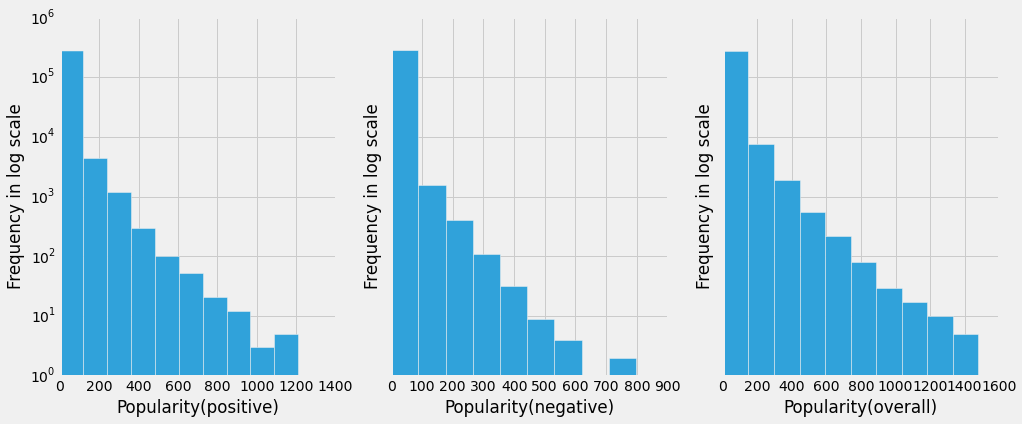

In [152]:
with plt.style.context('fivethirtyeight'):
    fig, axises = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(15, 6)
    fig.set_axes
    for ax, col in zip(axises, ['postive', 'negative', 'overall']):
        ax.hist(dataframe['popularity_' + col], bins=10)
        ax.set_yscale('log')
        ax.set_xlabel('Popularity({})'.format(col))
        ax.set_ylabel('Frequency in log scale')
    axises[0].set_xlabel('Popularity(positive)')

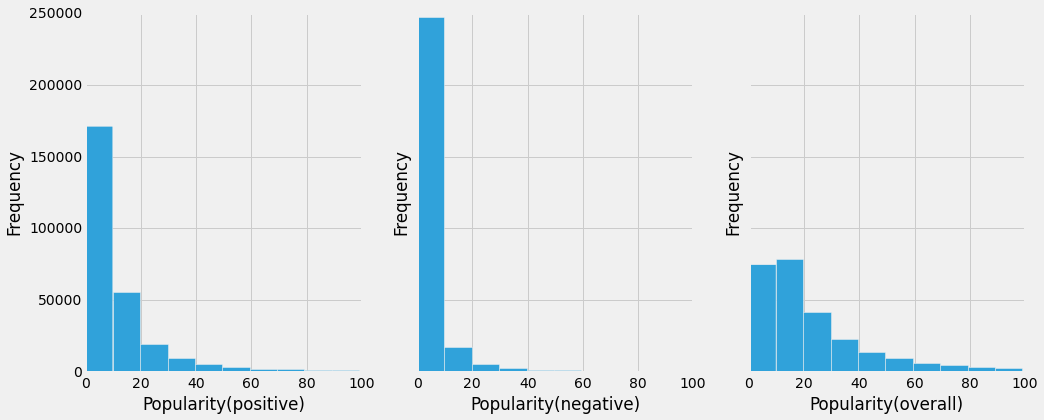

In [154]:
with plt.style.context('fivethirtyeight'):
    fig, axises = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(15, 6)
    fig.set_axes
    for ax, col in zip(axises, ['postive', 'negative', 'overall']):
        target = dataframe['popularity_' + col]
        ax.hist(target[target < 100], bins=10)
        #ax.set_yscale('log')
        ax.set_xlabel('Popularity({})'.format(col))
        ax.set_ylabel('Frequency')
    axises[0].set_xlabel('Popularity(positive)')

In [4]:
overall = dataframe.popularity_overall

In [7]:
for p in range(10):
    print(overall.quantile(p/10))

0.0
5.0
8.0
10.0
14.0
17.0
22.0
29.0
42.0
73.0
